<a href="https://colab.research.google.com/github/mitawhy/Mini-Project-Data-Mining/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEMPREDIKSI KESUKSESAN STARTUP DARI CRUNCHBASE**

#**Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install geopandas
import geopandas as gpd
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memprediksi kesuksesan dari beberapa startup yang saat ini tengah beroperasi. Apakah startup-startup tersebut akan berubah menjadi sukses atau justru gagal. Dengan adanya dataset ini, dapat membantu para investor untuk mengidentifikasi startup dengan potensi tinggi dan menghindari usaha berisiko. Dengan itu, investor dapat membuat keputusan investasi yang tepat. Dataset yang ada juga dapat memberikan informasi kepada startup terkait agar dapat melakukan evaluasi. Selain itu, dataset ini juga dapat menentukan startup di bidang apa yang akan mencapai kesuksesan besar.

##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah tingkat risiko kegagalan yang cukup tinggi pada startup. Dengan ketersediaan data yang cukup, dapat membantu para pendiri startup untuk memahami dan menganalisis faktor-faktor apa saja yang dapat memberikan kegagalan untuk startup nya dan dapat menghindari hal tersebut.

##**Data Mining Goals**

Tujuan dari Data Mining pada dataset ini adalah untuk memprediksi kesuksesan dari beberapa startup yang saat ini sedang berjalan/beroperasi. Data mining digunakan untuk menganalisis, mengidentifikasi, dan menentukan karakteristik yang membedakan antara startup yang sukses dan yang gagal. Masalah ini akan diselesaikan melalui pendekatan Supervised Machine Learning dengan melatih model berdasarkan sejarah startup yang diakuisisi atau ditutup.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data-data yang relevan terkait startup, seperti data keuangan dan lainnya dari sumber yang telah tersedia. Lalu dilakukan pemahaman yang mendalam terkait dataset yang ada. Selanjutnya, dilakukan pemeriksaan, pembersihan, dan persiapan data untuk di analisis. Kemudian menentukan tools apa saja yang akan digunakan. Nantinya, hasil dari data mining pada dataset ini akan digunakan oleh orang-orang terkait yang membutuhkan data tersebut sebagai bahan pertimbangan untuk bisnisnya.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset dengan judul "Startup Success/Fail Dataset from Crunchbase" yang digunakan kali ini didapatkan dari website 'Kaggle'. Dimana dataset ini berisikan data-data yang digunakan untuk memprediksi kesuksesan startup yang ada pada dataset ini.

Link Sumber Dataset: https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase

In [2]:
data = 'https://raw.githubusercontent.com/mitawhy/Mini-Project-Data-Mining/main/Checkpoint%201/big_startup_success_dataset.csv'
df = pd.read_csv(data)
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


##**Describe Data**

####Informasi Dasar

In [3]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 66368
Jumlah kolom: 14


Dari output yang tampil di atas, dijelaskan bahwa terdapat 66.368 baris dan 14 kolom pada dataset tersebut.

####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


Jangan lupa sertakan penjelasan tiap kolomnya di sini ya, dari nama kolom, berapa jumlahnya, dan tipe data dari kolom tersebut (Kalau kolomnya 10 ya di buat sampai nomor 10)
Berikut adalah penjelasan untuk setiap kolom:
1. **permalink**: Berisi link ke organisasi perushaan tersebut di crunchbase. Memiliki 66368 baris dan bertipe data object (string atau teks).
2. **name**: Berisi nama startup. Memiliki 66367 baris dan bertipe data object.
3. **homepage_url**: Kolom ini berisikan situs dari startup nya. Memiliki 61310 baris dan bertipe data object.
4. **category_list**: Berisi jenis atau kategori dari startup tersebut, seperti finance, sports, dll. Memiliki 63220 baris dan bertipe data object.
5. **funding_total_usd**: Berisi total pendaan startup dalam USD. Memiliki 66368 baris dan bertipe data object.
6. **status**: Berisi status dari startup seperti operating, closed, acquired, dan ipo. Memiliki 66368 baris dan bertipe data object.
7. **country_code**: Berisi kode negara dari startup. Memiliki 59410 baris dan bertipe data object.
8. **state_code**: Berisi Kode Negara lokasi perusahaan. Memiliki 57821 baris dan bertipe data object.
9. **region**: Berisi Wilayah lokasi perusahaan. Memiliki 58338 baris dan bertipde data object.
10. **city**: Berisi Kota lokasi perusahaan. Memiliki 58340 baris dan bertipe data object.
11. **funding_rounds**: Berisi jumlah putaran pendanaan startup. Memiliki 66368 baris dan bertipe data int64 (bilangan bulat).
12. **founded_at**: Berisi tanggal didirikannya perusahaan/startup. Memiliki 51147 baris dan bertipe data object.
13. **first_funding_at**: Berisi tanggal pendanaan pertama startup. Memiliki 66344 baris dan bertipe data object.
14. **last_funding_at**: Berisi tanggal pendanaan terakhir startup. Memiliki 66368 baris dan bertipe data object.





####Informasi Statistik Deskriptif

In [5]:
df.describe()

,funding_rounds
count,66368.000000
mean,1.732522
std,1.360251
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


Tabel di atas menunjukkan kolom hasil statistik dari kolom numerik yang ada pada dataset. Pada dataset ini, terdapat kolom funding_rounds sebagai kolom numerik. Kolom funding_rounds menunjukkan jumlah putaran pendanaan yang dilakukan oleh perusahaan/startup yang ada.

* **count**: Jumlah total putaran pendanaan dari seluruh startup adalah 66368.000000
* **mean**: Rata-rata startup melakukan putaran pendanaan sebanyak 1,7 atau 2 kali.
* **std**: Standar deviasi nya sekitar 1 kali. Angka ini tergolong rendah, maka dari itu variasi data kecil.
* **min**: Putaran pendanaan yang paling rendah dilakukan sebanyak 1 kali.
* **25%**: Kuartil pertama, 25% startup melakukan putaraan pendanaan sebanyak 1 kali.
* **50%**: Kuartil kedua, 50% startup melakukan putaran pendanaan sebanyak 1 kali.
* **75%**: Kuartil ketiga, 75% startup melakukan putaran pendanaan sebanyak 2 kali.
* **max**: Putaran pendanaan pada startup paling banyak dilakukan sebanyak 19 kali.

##**Exploratory Data Analysis**

#### **Presentase Status Startup**

Text(0.5, 1.0, 'Persentase Status Startup')

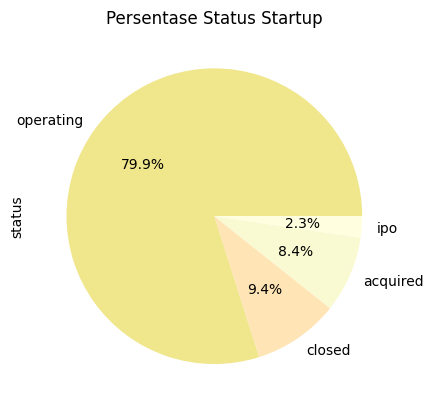

In [6]:
fig, ax = plt.subplots()

status_counts = df['status'].value_counts()
colors = {'operating' : 'khaki', 'closed' : 'moccasin', 'acquired' : 'lightgoldenrodyellow', 'ipo' : 'lightyellow'}
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360, colors=[colors[k] for k in status_counts.index])
plt.title("Persentase Status Startup")

Diagram di atas menunjukkan bahwa sebanyak 79,9% startup yang ada pada dataset masih beroperasi hingga sekarang. Sedangkan 9,4% startup sudah tutup atau berhenti beroperasi. 8,4% telah diakuasi/diambil alih oleh perusahaan lain. Dan 2,3% startup lainnya sedang/telah transisi dari perusahaan swasta ke perusahaan publik, dari awalnya perusahaan yang sepenuhnya dimiliki terbatas secara privat kemudian menjadi perusahaan terbuka yang bisa dimiliki siapa saja.

#### **Jumlah Startup berdasarkan Funding Rounds**

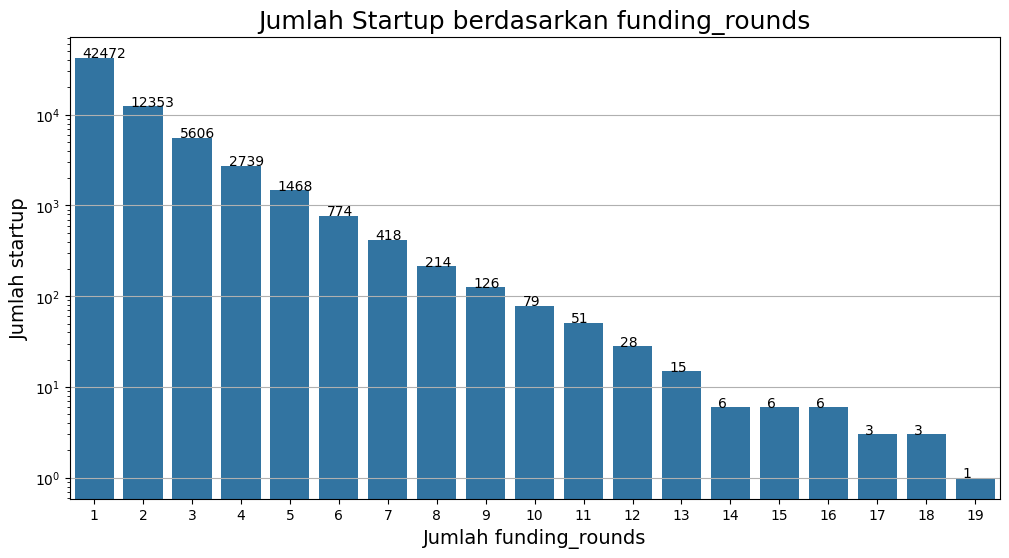

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts())
plt.title('Jumlah Startup berdasarkan funding_rounds',size=18)
plt.ylabel('Jumlah startup',size=14)
plt.xlabel('Jumlah funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

Berdasarkan diagram di atas, terlihat bahwa setiap startup setidaknya melakukan 1 kali pemutara pendanaan (funding rounds). Dan paling banyak dilakukan sebanyak 19 kali oleh 1 startup.

#### **Top 1% Kategori Startup**

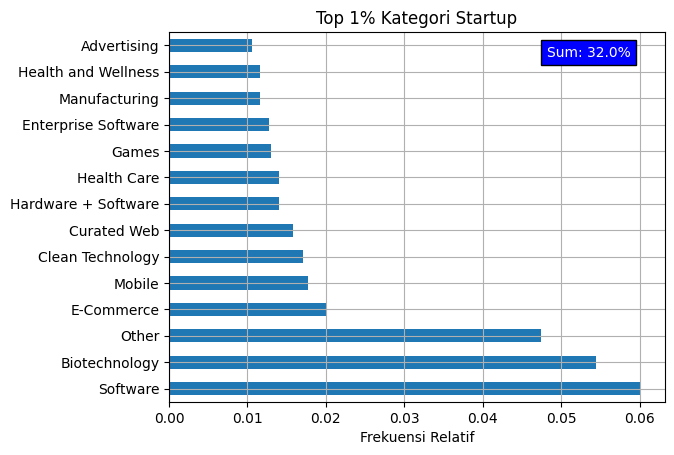

In [8]:
categories = df['category_list']
categories = categories.fillna('Other')
categories.value_counts()

categories_norm = categories.value_counts(normalize=True)
top_1_percent = categories_norm[categories_norm>0.01]
top_1_percent.plot(kind='barh')
plt.title('Top 1% Kategori Startup')
plt.xlabel('Frekuensi Relatif')
plt.grid(True)
plt.text(0.8*max(top_1_percent), len(top_1_percent)-1,f'Sum: {top_1_percent.sum().round(3)*100}%', ha='left', va='top',color='white', bbox=dict(facecolor='blue', alpha=1))
plt.show()

Dari diagram di atas, dapat disimpulkan bahwa kategori 'Software' saat ini sedang banyak ditekuni oleh banyak startup. Disusul oleh 'Biotechnology'.

#### **Persebaran Lokasi Startup**

<ipython-input-9-f62cfbf3238b>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


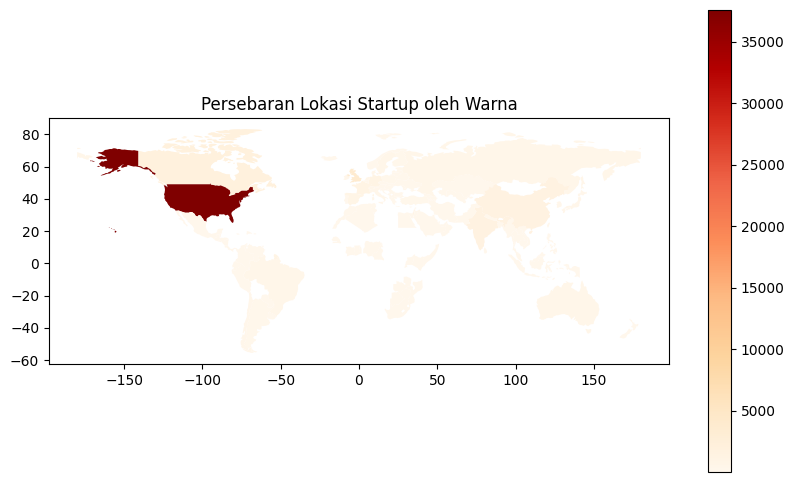

In [9]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = df.groupby('country_code').size().reset_index(name='counts')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country_code')
merged.plot(column='counts', cmap='OrRd', legend=True, figsize=(10,6))
plt.title('Persebaran Lokasi Startup oleh Warna')
plt.show()

Berdasarkan grafik di atas, mayoritas besar dari startup yang ada pada dataset berlokasi di USA. Karena ada begitu banyak startup yang berlokasi di AS sehingga semua negara lain ditampilkan di bawah 5000.

#### **Jumlah Startup yang Masih Beroperasi berdasarkan Negara**

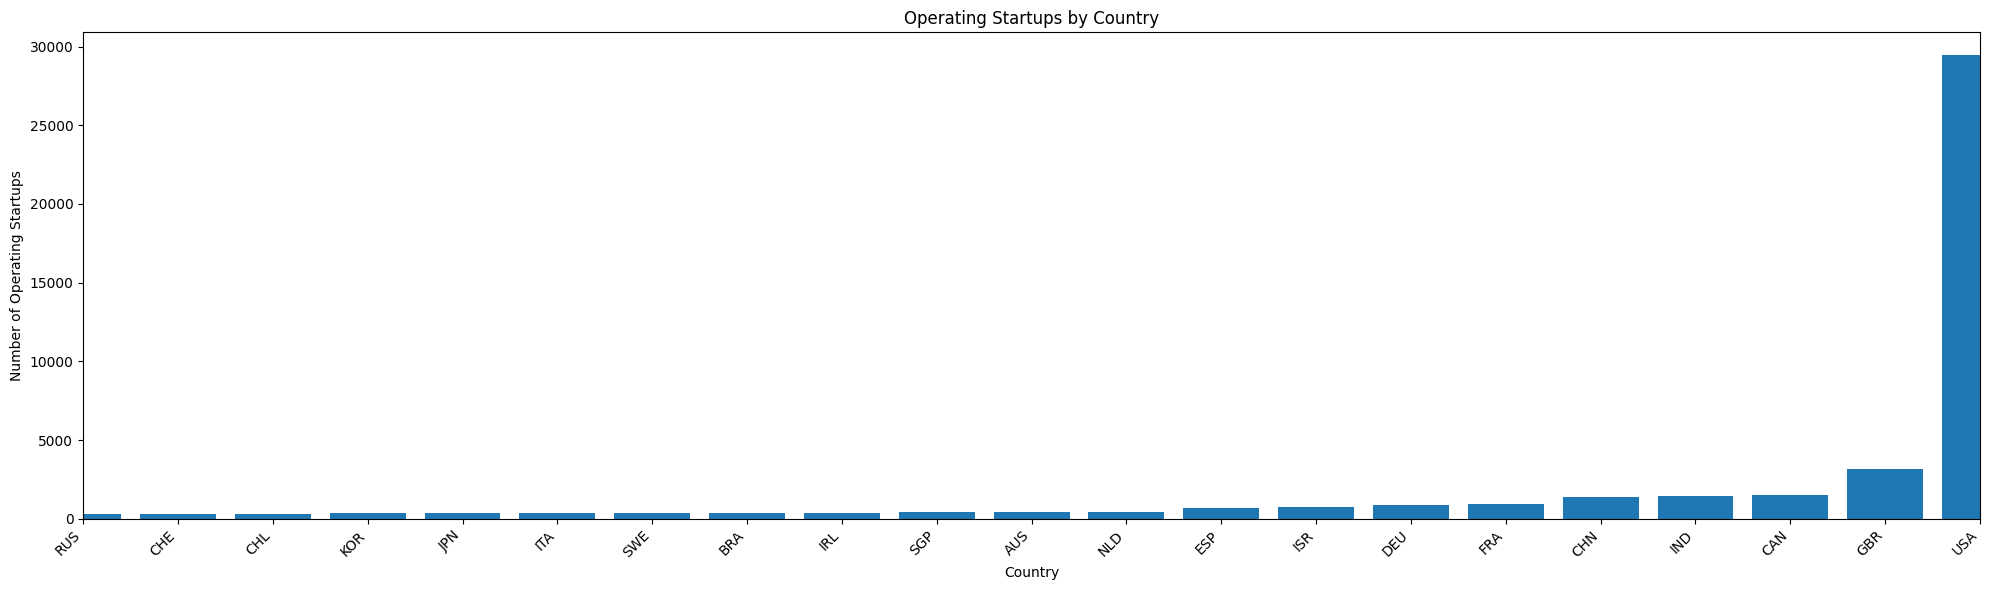

In [10]:
operating_df = df[df["status"] == "operating"]
country_counts = operating_df["country_code"].value_counts()

plt.figure(figsize=(20, 6))
plt.bar(country_counts.index, country_counts.values)
plt.xlabel("Country")
plt.ylabel("Number of Operating Startups")
plt.title("Operating Startups by Country")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.xlim(20, 0)

plt.tight_layout()
plt.show()

Diagram di atas memperlihatkan bahwa startup yang saat ini masih beroperasi paling banyak berada di USA dan memiliki perbandingan yang jauh dengan negara lainnya.

#### **Status Startup di Setiap Negara**

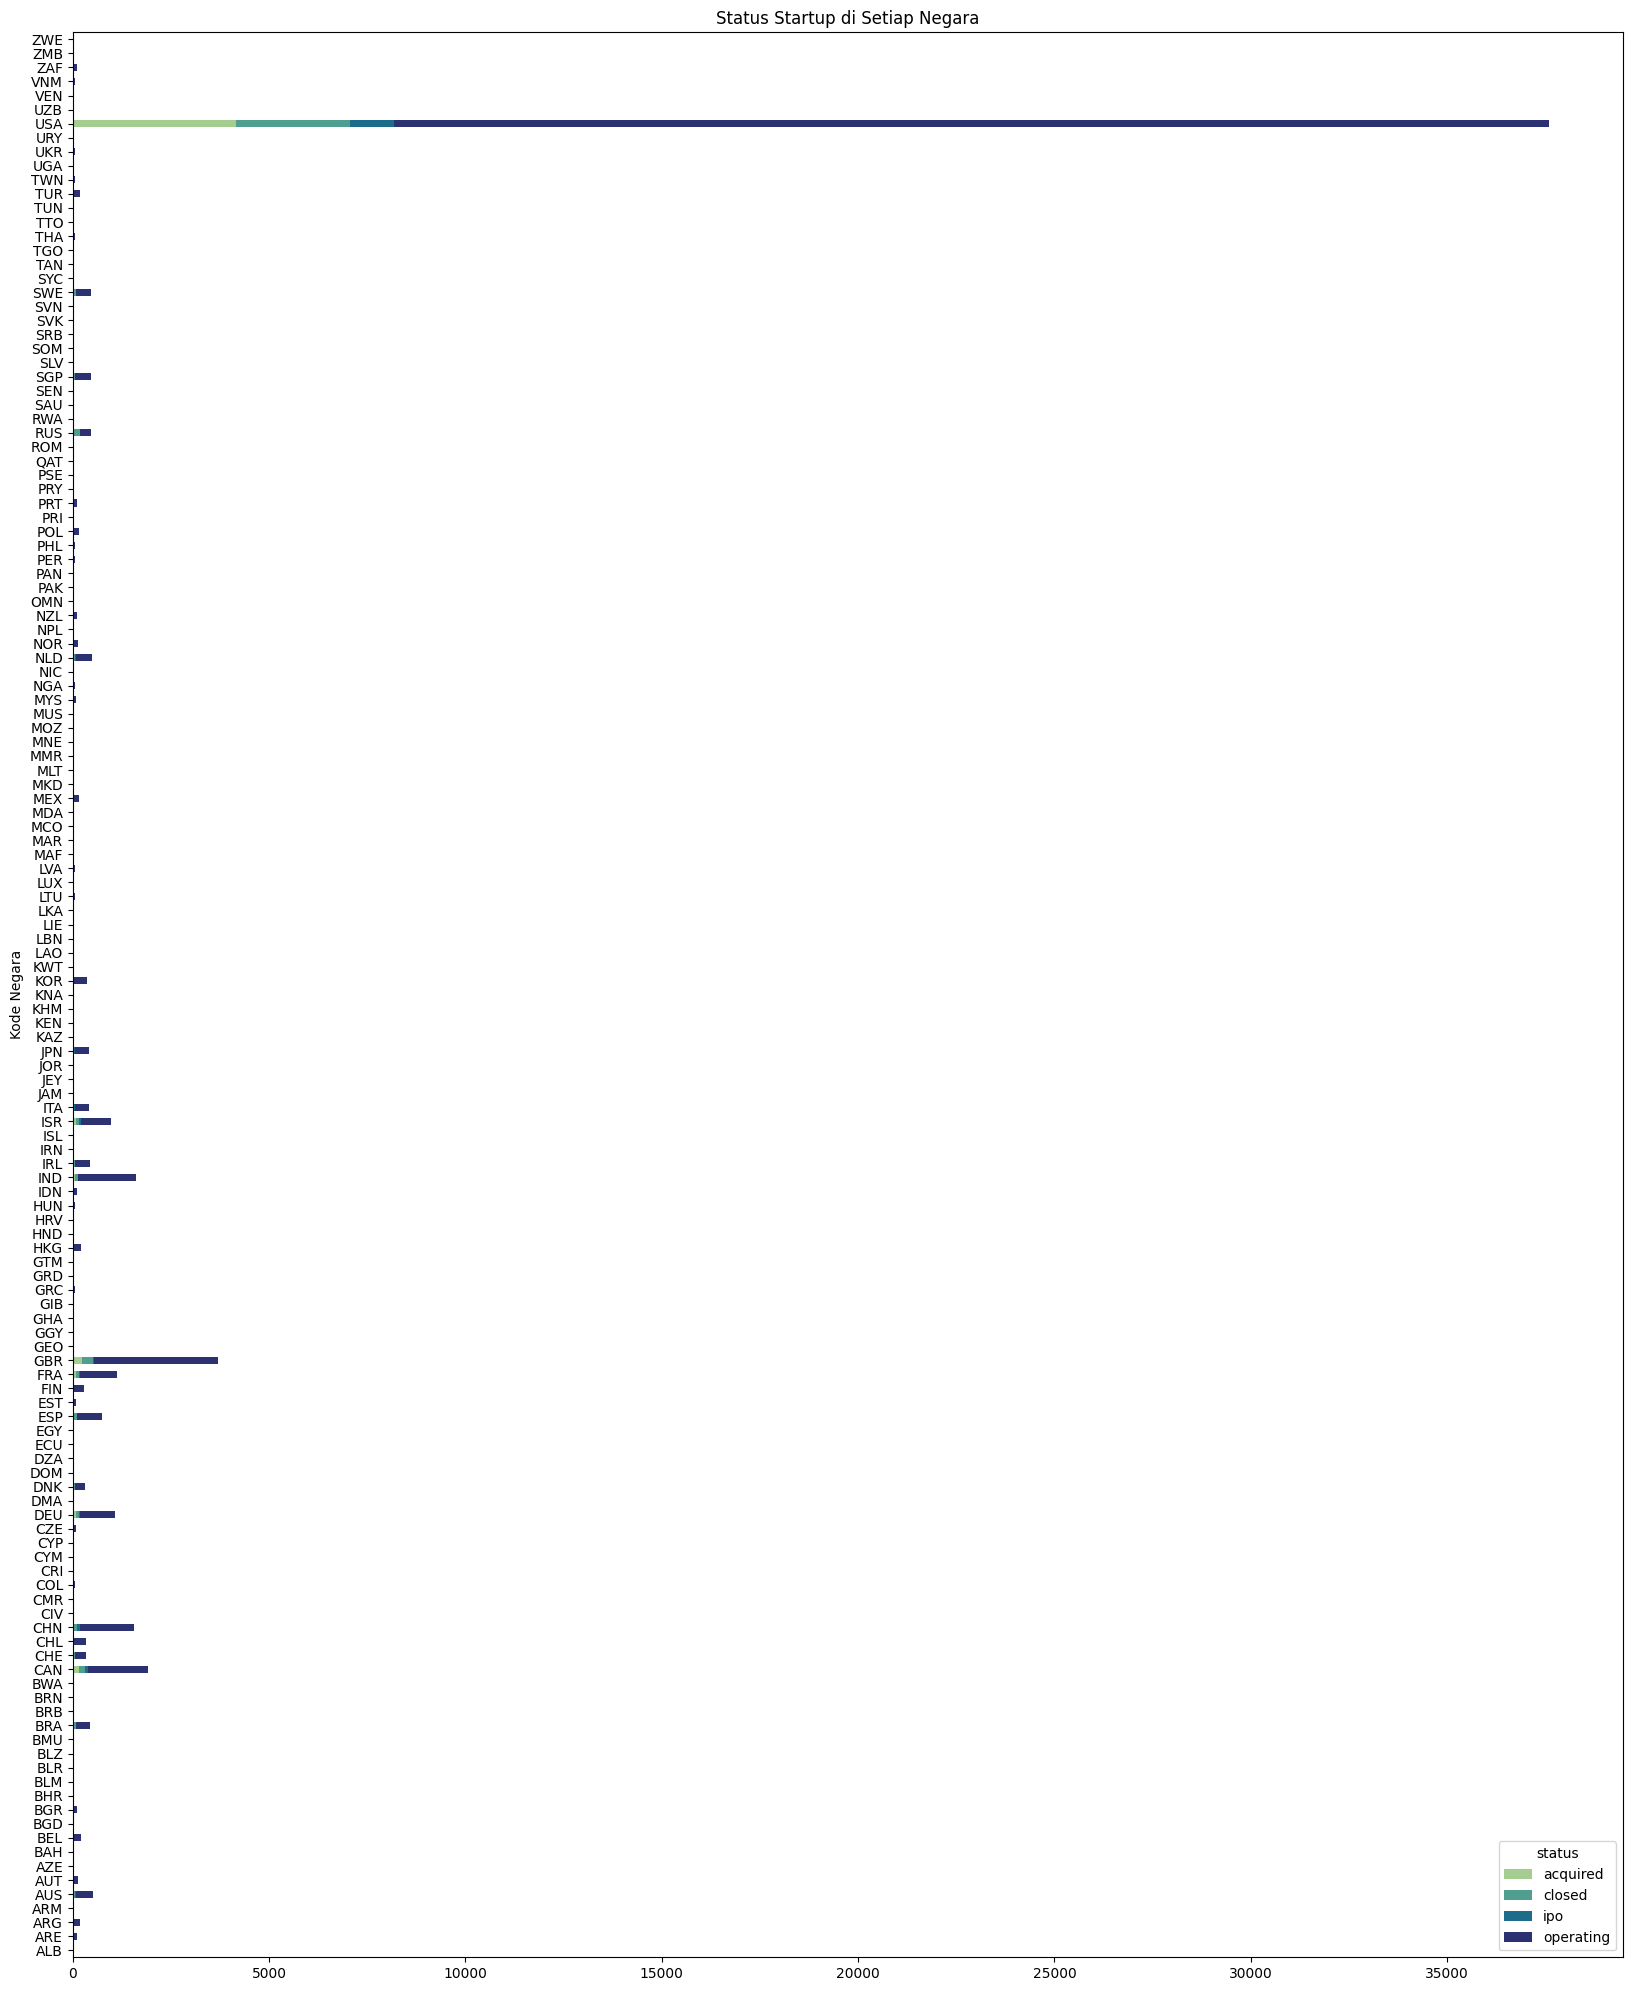

In [11]:
pivot_table = df.pivot_table(index='country_code', columns='status', aggfunc='size', fill_value=0)

pivot_table.plot(kind='barh', stacked=True, colormap='crest', figsize=(20, 25))

plt.ylabel('Kode Negara')
plt.title('Status Startup di Setiap Negara')

# # Batasi nilai sumbu Y
# plt.ylim(0, 10)  # Batasi nilai minimum dan maksimum
plt.show()

Diagram di atas menunjukkan status startup di setiap negara. Dapat dilihat bahwa USA memiliki startup yang begitu banyak dibandingkan dengan negara lainnya. Dan dapat dilihat bahwa banyak startup yang saat ini masih beroperasi.

##**Verify Data Quality**

####Missing Values

In [12]:
pd.DataFrame(df.isna().sum(), columns=['Jumlah Nilai Kosong'])

,Jumlah Nilai Kosong
permalink,0
name,1
homepage_url,5058
category_list,3148
funding_total_usd,0
status,0
country_code,6958
state_code,8547
region,8030
city,8028


Dari tabel di atas, terlihat bahwa cukup banyak kolom yang memiliki nilai kosong. Diantaranya adalah kolom nama, homepage_url, category_list, country_code, state_code, region, city, founded_at, dan first_funding_at. Sedangkan, kolom lainnya seperti kolom permalink, funding_total_usd, status, funding_rounds, dan last_funding_at tidak memiliki nilai kosong yang dimana artinya adalah kolom tersebut memiliki nilai yang valid dan lengkap tanpa kekurangan informasi.

####Outliers Values

In [13]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Nama Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
result_df = pd.DataFrame(results)
result_df.set_index('Nama Kolom', inplace=True)
result_df = result_df.rename_axis(None, axis=0).rename_axis('Nama Kolom', axis=1)

# Menampilkan dataframe
display(result_df)

Nama Kolom,Persentase Outliers
funding_rounds,8.945576


Berdasarkan output di atas, kolom funding_rounds memiliki persentse outliers sebanyak 8.9% atau sekitar 9%. Itu menunjukkan bahwa ada beberapa startup yang melakukan putaraan pendanaan yang lebih banyak atau signifikan dibandingkan rata-rata startup lainnya.

####Duplicated Values

In [14]:
df[df.duplicated()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


Berdasarkan output di atas, dapat dilihat bahwa tidak ada satupun nilai/record data yang muncul. Maka dari itu, dapat disimpulkan bahwa tidak ada duplikasi data pada dataset ini, karena setiap baris atau record data memiliki nilai yang unik/satu.

####Inconsistent Values / Noise (Optional)

In [15]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**DATA PREPARATION**

##**Mengubah Tipe Data**

In [16]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return None

df['funding_total_usd'] = df['funding_total_usd'].apply(convert_to_float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   permalink          66368 non-null  object 
 1   name               66367 non-null  object 
 2   homepage_url       61310 non-null  object 
 3   category_list      63220 non-null  object 
 4   funding_total_usd  53583 non-null  float64
 5   status             66368 non-null  object 
 6   country_code       59410 non-null  object 
 7   state_code         57821 non-null  object 
 8   region             58338 non-null  object 
 9   city               58340 non-null  object 
 10  funding_rounds     66368 non-null  int64  
 11  founded_at         51147 non-null  object 
 12  first_funding_at   66344 non-null  object 
 13  last_funding_at    66368 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 7.1+ MB


Tipe data pada kolom funding_total_usd perlu diubah menjadi float dari yang sebelumnya string. Karena kolom funding_total_usd berisi nilai numerik yaitu total pendanaan startup dalam usd.

##**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

Ini adalah output dalam persentase (%), yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong atau missing values. Missing value sendiri biasanya adalah data-data yang tidak dapat terdeteksi dan disimbolkan dengan "Nan" atau tanda tanya (?) atau blank cell yang tidak ada nilainya sama sekali.

In [18]:
print((df.isna().sum() / len(df)) * 100)

permalink             0.000000
name                  0.001507
homepage_url          7.621143
category_list         4.743250
funding_total_usd    19.263802
status                0.000000
country_code         10.483968
state_code           12.878194
region               12.099204
city                 12.096191
funding_rounds        0.000000
founded_at           22.934245
first_funding_at      0.036162
last_funding_at       0.000000
dtype: float64


Berdasarkan data di atas, ada 9 kolom yang memiliki missing values, yaitu kolom name, homepage_url (7-8%), category_list (4-5%), country_code (10-11%), state_code (12-13%), region (12%), city (12%), founded_at (22-23%), dan first_funding_at. Di bawah ini akan dijabarkan lebih lanjut.

Berikut adalah nilai kosong pada kolom founded_at.

In [19]:
df[df['founded_at'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,NaN,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,2,NaN,2008-01-07,2010-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66351,/organization/zynergy-projects-services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,NaN,operating,IND,25,Chennai,Chennai,1,NaN,2015-08-19,2015-08-19
66359,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,1510500.0,operating,USA,MA,Boston,Cambridge,4,NaN,2010-10-21,2012-10-18
66360,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,8500000.0,acquired,USA,WI,Milwaukee,Milwaukee,1,NaN,2004-12-16,2004-12-16
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01


Terdapat 15221 baris yang kosong pada kolom founded_at.

Berikut adalah nilai kosong di state_code.

In [20]:
df[df['state_code'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865.0,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000.0,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,NaN,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000.0,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000.0,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 8547 baris yang kosong pada kolom state_code.

Berikut adalah nilai kosong pada kolom region.

In [21]:
df[df['region'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865.0,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000.0,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,NaN,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
45,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000.0,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000.0,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 8030 baris yang kosong pada kolom region.

Berikut adalah nilai kosong pada kolom city.

In [22]:
df[df['city'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865.0,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000.0,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,NaN,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
45,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000.0,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000.0,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 8028 baris yang kosong pada kolom city.

Berikut adalah nilai kosong pada kolom country_code.

In [23]:
df[df['country_code'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
21,/organization/1000chi,Beijing 1000CHI Software Technology,http://www.1000chi.com/,Mobile,43923865.0,operating,NaN,NaN,NaN,NaN,1,2008-01-01,2010-04-01,2010-04-01
35,/organization/10k-2,Beans Around,http://beansaround.com/,Coffee|Delivery|Subscription Service,100000.0,operating,NaN,NaN,NaN,NaN,1,2015-04-01,2015-09-04,2015-09-04
39,/organization/10tracks-2,10tracks,http://10tracks.com,iOS|Mobile|Music,NaN,operating,NaN,NaN,NaN,NaN,2,2012-01-01,2013-07-31,2014-02-03
45,/organization/115-network-disks,115 network disks,http://www.115.com/,EdTech|Education,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66317,/organization/zuumtel,ZUUMTEL,http://www.zuumtel.com,Automotive|Design|Real Time,300000.0,closed,NaN,NaN,NaN,NaN,2,2014-09-16,2013-04-01,2014-09-16
66325,"/organization/zwayo-""on-demand-valet-parking""","Zwayo ""On-Demand Valet Parking""",http://www.zwayo.co,Apps|Cars|Parking,60000.0,operating,NaN,NaN,NaN,NaN,1,2014-09-01,2014-09-01,2014-09-01
66333,/organization/zyfin,Zyfin,http://www.zyfin.com/,Finance,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2011-11-01,2011-11-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01


Terdapat 6958 baris yang kosong pada kolom country_code.

Berikut adalah nilai kosong pada kolom homepage_url.

In [24]:
df[df['homepage_url'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,NaN,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21
16,/organization/1-of-99,1 of 99,NaN,Entertainment|Games,100000.0,operating,USA,CA,SF Bay Area,Mountain View,1,2014-12-01,2014-12-13,2014-12-13
43,/organization/10°north,10°North,NaN,Fashion,NaN,operating,CAN,ON,Toronto,Mississauga,1,2013-01-05,2014-08-12,2014-08-12
51,/organization/121-rentals,121 Rentals,NaN,Real Estate,NaN,operating,USA,TX,TX - Other,Amarillo,1,2011-04-12,2014-09-03,2014-09-03
75,/organization/16-mile-solutions,16 Mile Solutions,NaN,Software,199957.0,operating,USA,WA,Seattle,Seattle,1,2006-01-01,2009-06-11,2009-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66247,/organization/zperfectgift,zPerfectGift,NaN,Social Media,25000.0,operating,USA,UT,Salt Lake City,Midvale,1,2010-01-01,2012-09-26,2012-09-26
66267,/organization/zuffle,Zuffle,NaN,Application Platforms|Entertainment|Games|Grap...,132351.0,operating,ITA,17,ITA - Other,Prato,1,NaN,2013-07-26,2013-07-26
66292,/organization/zumodrive,zumodrive,NaN,Cloud Computing|Digital Media|File Sharing,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2007-09-01,2007-09-01
66311,/organization/zuse,Zuse,NaN,Software,NaN,operating,USA,NY,New York City,New York,1,NaN,2013-05-01,2013-05-01


Terdapat 5058 baris yang kosong pada kolom homepage_url.

Berikut adalah nilai kosong pada kolom category_list.

In [25]:
df[df['category_list'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
56,/organization/123feng-com,123Feng.Com,http://123feng.com/,NaN,13000000.0,operating,CHN,2,Hangzhou,Hangzhou,1,2014-01-01,2015-10-27,2015-10-27
71,/organization/15fen,15Fen,http://www.15fen.com/,NaN,NaN,operating,CHN,30,Guangzhou,Guangzhou,1,NaN,2013-12-15,2013-12-15
79,/organization/17-media,17 Media,http://17.media,NaN,10000000.0,operating,NaN,NaN,NaN,NaN,1,2015-07-15,2015-11-05,2015-11-05
109,/organization/1mxians,1mxians,http://www.1mxian.com/,NaN,15000000.0,operating,CHN,22,Beijing,Beijing,1,2014-01-01,2015-12-02,2015-12-02
113,/organization/1rp-media,1RP Media,NaN,NaN,NaN,operating,USA,CA,Los Angeles,Los Angeles,1,2011-01-01,2012-06-29,2012-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66112,/organization/zkey-com,Zkey.com,http://zkey.com/,NaN,10000000.0,closed,NaN,NaN,NaN,NaN,1,NaN,1999-11-22,1999-11-22
66115,/organization/zlango,Zlango,http://www.zlango.com,NaN,12000000.0,closed,NaN,NaN,NaN,NaN,1,NaN,2007-02-12,2007-02-12
66120,/organization/zlote-mysli,Zlote Mysli,http://www.zlotemysli.pl/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2009-01-01,2009-01-01
66298,/organization/zuoyebang,Zuoyebang,http://zuoye.baidu.com/,NaN,NaN,operating,NaN,NaN,NaN,NaN,1,NaN,2015-09-03,2015-09-03


Terdapat 3148 baris yang kosong pada kolom category_list.

Berikut adalah nilai kosong pada kolom first_funding_at.

In [26]:
df[df['first_funding_at'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
2445,/organization/align-commerce,Align Commerce,https://aligncommerce.com/,Bitcoin|Payments,1.250000e+07,operating,USA,CA,SF Bay Area,San Francisco,3,2014-02-01,NaN,2015-11-17
3334,/organization/aniways,Aniways,http://www.aniways.com,Advertising|Chat|Messaging|Mobile|Social Media,1.190000e+06,operating,ISR,5,Tel Aviv,Tel Aviv-yafo,6,2012-01-01,NaN,2014-03-23
8029,/organization/booknbloom,Book'n'Bloom,http://www.booknbloom.com,CRM|Facebook Applications|Small and Medium Bus...,1.408347e+06,operating,CYP,4,Cyprus,Nicosia,5,2011-11-01,NaN,2014-07-01
9843,/organization/carglass-inc,"CarGlass, Inc.",http://www.carglassapp.com,Automotive|Content Discovery|Machine Learning|...,1.000000e+06,operating,USA,CA,SF Bay Area,Palo Alto,2,2014-05-12,NaN,2014-10-22
10204,/organization/cbtec,CBTec Oy,http://www.eliademy.com,Education|Mobility|Online Education|Software,3.040120e+05,operating,FIN,13,Helsinki,Helsinki,2,2012-02-08,NaN,2014-04-24
14717,/organization/dashtag,DashTag,http://www.getdashtag.com,NaN,6.085474e+04,operating,NaN,NaN,NaN,NaN,2,2015-10-01,NaN,2015-11-20
16250,/organization/dopay,dopay,http://www.dopay.com,Financial Services,1.675551e+06,operating,GBR,H9,London,London,3,2014-01-04,NaN,2014-09-01
17589,/organization/eku-power-drives,EKU Power Drives,http://www.ekupd.com/,Clean Energy|Energy Efficiency|Industrial|Mini...,2.971490e+05,operating,DEU,1,Stuttgart,Stuttgart,3,2015-03-04,NaN,2015-01-20
20101,/organization/fear-less-solutions,Revolar,http://www.revolar.com,Wearables,3.320000e+06,operating,USA,CO,Denver,Denver,3,2013-01-01,NaN,2015-11-26
23422,/organization/gobold,gobold,http://www.gobold.com/,Banking|Payments,9.600000e+05,operating,USA,CA,SF Bay Area,San Francisco,2,2013-10-29,NaN,2014-01-27


Berikut adalah nilai kosong pada kolom name.

In [27]:
df[df['name'].isnull()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,25000.0,closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01


Terdapat 1 baris yang kosong pada kolom name.

#####**Hapus Missing Values**

Berdasarkan hasil pengecekkan missing value di atas, tidak ada kolom yang mencapai 70%, sehingga tidak perlu melakukan penghapusan missing values.

#####Imputasi Missing Values

Karena semua kolom yang memiliki missing values adalah bukan kolom bertipe data angka dan tidak bisa mencari nilai mean, median, dan kuartil. Sehingga menggunakan nilai modus.

In [28]:
df['founded_at'] = df['founded_at'].fillna(df['founded_at'].mode()[0])

In [29]:
df['state_code'] = df['state_code'].fillna(df['state_code'].mode()[0])

In [30]:
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [31]:
df['city'] = df['city'].fillna(df['city'].mode()[0])

In [32]:
df['country_code'] = df['country_code'].fillna(df['country_code'].mode()[0])

In [33]:
df['homepage_url'] = df['homepage_url'].fillna(df['homepage_url'].mode()[0])

In [34]:
df['category_list'] = df['category_list'].fillna(df['category_list'].mode()[0])

In [35]:
df['first_funding_at'] = df['first_funding_at'].fillna(df['first_funding_at'].mode()[0])

In [36]:
df['name'] = df['name'].fillna(df['name'].mode()[0])

In [37]:
df['funding_total_usd'] = df['funding_total_usd'].fillna(df['funding_total_usd'].dropna().mean())

#####**Pengecekkan Ulang**

In [38]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
permalink,0.0
name,0.0
homepage_url,0.0
category_list,0.0
funding_total_usd,0.0
status,0.0
country_code,0.0
state_code,0.0
region,0.0
city,0.0


Dari data di atas, terlihat bahwa presentase missing values dari setiap kolom sudah menjadi 0, berarti tidak ada lagi missing values pada dataset ini.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [39]:
df[df.duplicated()]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


Berdasarkan data di atas, terlihat bahwa tidak ada satupun data yang duplikat. Berarti dalam dataset tersebut tidak ada nilai duplikat sama sekali.

#####**Hapus Nilai Duplikat**

Karena berdasarkan hasil pengecekkan nilai duplikat bahwa tidak ada nilai duplikat, maka tidak perlu dilakukan hapus nilai duplikat.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [40]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
funding_total_usd,6.209318
funding_rounds,8.945576


Data di atas menunjukkan presentase nilai yang jauh berbeda dari nilai lainnya dalam sebuah kumpulan data.

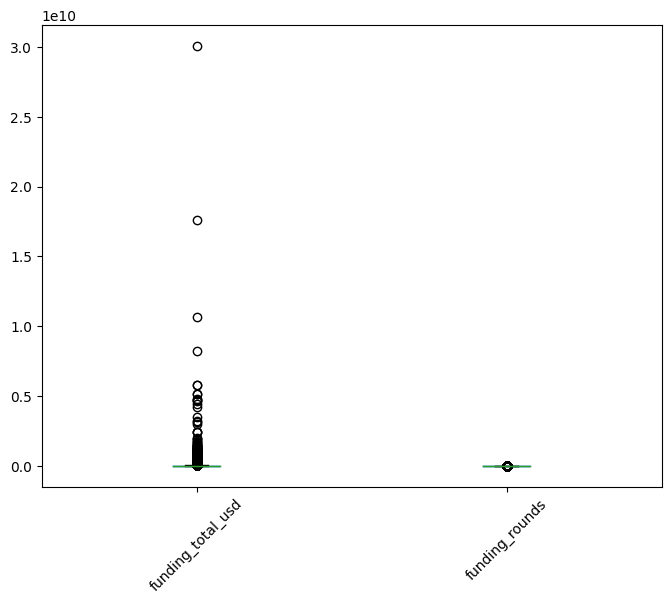

In [41]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

Dari gambar di atas menunjukkan bahwa pola dari outliers nya sama, tidak ada nilai yang tiba-tiba jauh berbeda dari kumpulan data lainnya.

#####**Hapus Outliers**

Karena tidak ada nilai yang tiba-tiba jauh berbeda dengan nilai lainnya, makan outliers tidak perlu dihapus.

#####**Imputasi Outliers**

Tidak memerlukan imputasi outliers, karena tidak ada kolom dengan presentase outliers >=10%.

#####**Pengecekkan Ulang**

In [42]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
funding_total_usd,6.209318
funding_rounds,8.945576


Presentase outliers tetap, yaitu 8-9% karena outliers tidak dihapus.

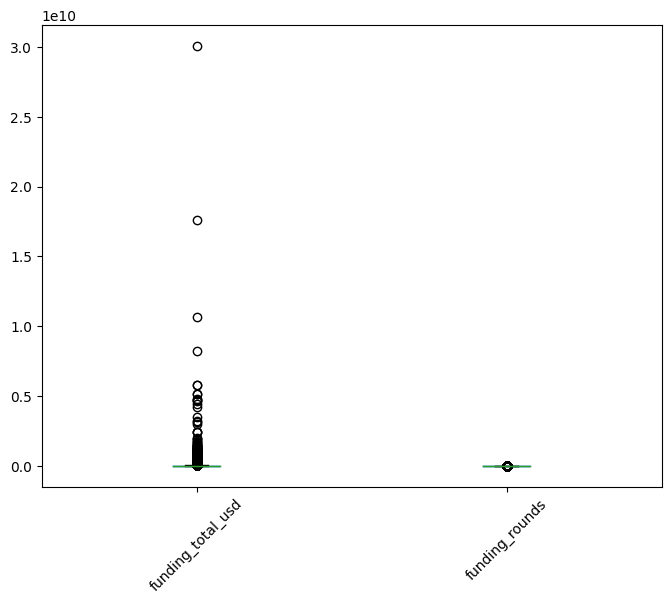

In [43]:
boxplot = df.boxplot(grid=False, rot=45,  figsize=(8,6))

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [44]:
df['founded_year'] = df['founded_at'].str[:4]

Disini ditambahkan kolom founded_yar yang diambil dari kolom founded_at. Dimana kolom founded_at ini berisi tanggal, bulan, dan tahun pendirian startup. Namun agar lebih efisien, dibuatlah kolom founded_year yang mengambil tahunnya saja.

In [45]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')

df['status_class'] = status

Disini menambahkan kolom status_class. Menyederhanakan kategori status dari kolom status. Dimana acquired dan ipo masuk ke dalam kategori success, closed masuk ke dalam kategori fail, dan operating tetap menjadi kategori operating.

In [46]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category

Disini menambahkan kolom main_category. Menyederhanakan list kategori startup pada kolom category_list. Karena pada category_list itu dalam satu kolom terdapat banyak kategori, maka dibuat seakan kategori pertama adalah main category dan sisanya adalah sub category, dan sub category itu akan dihapus hingga tersisa main category nya saja.

In [47]:
def funding_category(nilai):
    if nilai <= 1000000:
        return 'Low'
    elif nilai > 1000000 and nilai <= 100000000:
        return 'Middle'
    elif nilai > 100000000:
        return 'High'
    else:
        return 'Invalid Value'

df['funding_total_category'] = df['funding_total_usd'].apply(funding_category)

Menambahkan kolom funding_category dimana total funding dikategorikan berdasarkan jumlah funding nya. Jika total funding kurang dari atau sama dengan 1000000 maka dikategorikan 'Low', jika total funding lebih dari 1000000 dan kurang dari atau sama dengan 100000000 maka dikategorikan 'Middle', jika total funding lebih dari 100000000 maka dikategorikan 'High. Namun jika selain itu, maka dikategorikan sebagai 'Invalid Value'.

###**Pengecekkan Hasil**

In [48]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,16,Mumbai,Mumbai,1,2012-01-01,2015-01-05,2015-01-05,2012,operating,Media,Middle
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,7.000000e+05,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014,operating,Application Platforms,Low
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3.406878e+06,operating,USA,CA,SF Bay Area,San Francisco,1,2012-01-01,2014-01-30,2014-01-30,2012,operating,Apps,Middle
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2.000000e+06,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007,operating,Curated Web,Middle
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,1.847860e+07,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,2010,operating,Software,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1.587301e+06,operating,CHN,22,Beijing,Beijing,1,2012-01-01,2012-04-01,2012-04-01,2012,operating,Enterprise Software,Middle
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,1.143040e+05,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01,2012,operating,Advertising,Low
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,Software,1.847860e+07,operating,USA,CA,SF Bay Area,San Francisco,1,2011-01-01,2014-08-01,2014-08-01,2011,operating,Software,Middle
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,1.819200e+04,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01,2014,operating,Consumer Electronics,Low


Pada tabel di atas, terlihat bahwa sudah ada 3 (tiga) kolom baru yaitu founded_year, status_class, dan funding_total_category.

##**Data Reduction**

###**Mengurangi Fitur-Fitur yang Kurang Relevan**

In [49]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [50]:
df = df.drop(['permalink','homepage_url','category_list','state_code','region','founded_at','status'], axis=1)

Kolom permalink, homepage_url, category_list, state_code, region, founded_at m dan status dirasa kurang relevan dan kurang berpengaruh terhadap analisis yang dilakukan, yaitu memprediksi kesuksesan startup. Sehingga perlu untuk dihapus agar dataset lebih efisien.

###**Pengecekkan Hasil**

In [51]:
df.head()

,name,funding_total_usd,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,#fame,1.000000e+07,IND,Mumbai,1,2015-01-05,2015-01-05,2012,operating,Media,Middle
1,:Qounter,7.000000e+05,USA,Delaware City,2,2014-03-01,2014-10-14,2014,operating,Application Platforms,Low
2,"(THE) ONE of THEM,Inc.",3.406878e+06,USA,San Francisco,1,2014-01-30,2014-01-30,2012,operating,Apps,Middle
3,0-6.com,2.000000e+06,CHN,Beijing,1,2008-03-19,2008-03-19,2007,operating,Curated Web,Middle
4,004 Technologies,1.847860e+07,USA,Champaign,1,2014-07-24,2014-07-24,2010,operating,Software,Middle


Pada tabel di atas terlihat hanya tersisa 11 kolom. 8 kolom asli dan 3 kolom tambahan yang sebelumnya.

1. name: Kolom yang tentunya penting karena memuat nama dari startup.
2. funding_total_usd: Kolom ini berisi jumlah pendanaan yang diterima startup dan ini dapat menjadi indikator potensi kesuksesan. Startup dengan pendanaan lebih besar biasanya memiliki peluang yang lebih tinggi untuk sukses.
3. country_code: Kolom ini cukup berpengaruh karena untuk menentukan, startup di negara mana yang paling banyak meraih kesuksesan. Karena negara dapat memengaruhi faktor-faktor seperti akses ke pasar, regulasi, dll.
4. city: Sama seperti dengan country_code, ini juga dapat memengaruhi faktor-faktor kesuksesan startup.
5. funding_rounds: Jumlah putaran pendanaan dapat memberikan indikator tentang minat investor dan kemajuan startup. Startup yang telah melalui banyak putaran pendanaan mungkin memiiki peluang lebih tinggi untuk sukses.
6. first_funding_at: Tanggal pendanaan yang pertama startup dapat memberikan informasi terkait waktu startup mulai menerima dana. Bisa saja startup yang menerima pendanaan lebih awal memiliki peluang lebih tinggi untuk sukses.
7. last_funding_at: Sama seperti tanggal pendanaan pertama, tanggal pendanaan terakhir juga dapat memberikan informasi yang berharga untuk dianalisis.
8. founded_year: Tahun pendirian startup dapat memberikan informasi terkait usia startup. Startup yang telah lama berdiri mungkin saja memiliki lebih banyak pengalaman.
9. status_class: Klasifikasi dari kolom status.
10. main_category: Kolom baru dari kolom category_list untuk mendapatkan main category (1 kategori) dari list kategori yang ada.
11. funding_total_category: Kolom pengkategorian dari funding_total_usd dengan ketentuan tertentu seperti yang sudah dijelaskan sebelumnya.

##**Data Transformation**

###**Mapping**

In [52]:
df['status_class'] = df['status_class'].map({'fail':0,'operating':1, 'success':2})
df['funding_total_category'] = df['funding_total_category'].map({'Low':0,'Middle':1, 'High':2, 'Invalid Value':3})

In [53]:
df

,name,funding_total_usd,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,#fame,1.000000e+07,IND,Mumbai,1,2015-01-05,2015-01-05,2012,1,Media,1
1,:Qounter,7.000000e+05,USA,Delaware City,2,2014-03-01,2014-10-14,2014,1,Application Platforms,0
2,"(THE) ONE of THEM,Inc.",3.406878e+06,USA,San Francisco,1,2014-01-30,2014-01-30,2012,1,Apps,1
3,0-6.com,2.000000e+06,CHN,Beijing,1,2008-03-19,2008-03-19,2007,1,Curated Web,1
4,004 Technologies,1.847860e+07,USA,Champaign,1,2014-07-24,2014-07-24,2010,1,Software,1
...,...,...,...,...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,1.587301e+06,CHN,Beijing,1,2012-04-01,2012-04-01,2012,1,Enterprise Software,1
66364,Zzzzapp Wireless ltd.,1.143040e+05,HRV,Split,4,2011-11-01,2014-03-01,2012,1,Advertising,0
66365,ÁERON,1.847860e+07,USA,San Francisco,1,2014-08-01,2014-08-01,2011,1,Software,1
66366,Ôasys,1.819200e+04,USA,San Francisco,1,2015-01-01,2015-01-01,2014,1,Consumer Electronics,0


###**Pengecekkan Hasil**

In [54]:
df.head()

,name,funding_total_usd,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,#fame,1.000000e+07,IND,Mumbai,1,2015-01-05,2015-01-05,2012,1,Media,1
1,:Qounter,7.000000e+05,USA,Delaware City,2,2014-03-01,2014-10-14,2014,1,Application Platforms,0
2,"(THE) ONE of THEM,Inc.",3.406878e+06,USA,San Francisco,1,2014-01-30,2014-01-30,2012,1,Apps,1
3,0-6.com,2.000000e+06,CHN,Beijing,1,2008-03-19,2008-03-19,2007,1,Curated Web,1
4,004 Technologies,1.847860e+07,USA,Champaign,1,2014-07-24,2014-07-24,2010,1,Software,1


#**Slicing Data**

In [55]:
sample = df.sample(frac=0.1, random_state=42)

print(sample)

                                 name  funding_total_usd country_code  \
18795                  Esoko Networks       1.500000e+06          MUS   
43960             PlanSource Holdings       9.400000e+07          USA   
61686  Veteran Ventures Angel Network       1.847860e+07          USA   
24567                        Hability       2.500000e+04          USA   
7451                            Blink       5.800000e+06          USA   
...                               ...                ...          ...   
2522                       Allclasses       1.500000e+06          USA   
15490                        Diaferon       9.270000e+05          DEU   
65342         youbeQ - Maps With Life       1.847860e+07          PRT   
17403                          Edufii       1.570000e+06          USA   
17324                      EdgeConneX       1.400800e+07          USA   

                  city  funding_rounds first_funding_at last_funding_at  \
18795            Ebène               1       201

In [56]:
sample

,name,funding_total_usd,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
18795,Esoko Networks,1.500000e+06,MUS,Ebène,1,2014-05-27,2014-05-27,2006,1,Agriculture,1
43960,PlanSource Holdings,9.400000e+07,USA,Orlando,4,2012-02-01,2015-08-21,2002,1,Software,1
61686,Veteran Ventures Angel Network,1.847860e+07,USA,San Francisco,1,2015-03-23,2015-03-23,2012,1,Finance,1
24567,Hability,2.500000e+04,USA,Pittsburgh,2,2013-06-04,2015-04-01,2011,1,Health and Wellness,0
7451,Blink,5.800000e+06,USA,Boston,1,2015-11-16,2015-11-16,2012,1,Electronics,1
...,...,...,...,...,...,...,...,...,...,...,...
2522,Allclasses,1.500000e+06,USA,Boston,1,2014-05-06,2014-05-06,2013,2,Curated Web,1
15490,Diaferon,9.270000e+05,DEU,Munich,1,2007-07-09,2007-07-09,2012,0,Biotechnology,0
65342,youbeQ - Maps With Life,1.847860e+07,PRT,Coimbra,1,2013-08-10,2013-08-10,2013,1,Maps,1
17403,Edufii,1.570000e+06,USA,San Luis Obispo,2,2012-05-01,2014-09-09,2012,1,EdTech,1


Slicing data digunakan untuk mengambil 10% data random dari data aslinya. Dari dataset sebanyak 66368 baris, menjadi 6637 baris. Hal ini dilakukan untuk efisiensi dataset.

#**Dataframe to CSV**

In [57]:
sample.to_csv('Data Cleaned.csv', index=False)

#**Link CSV**

https://drive.google.com/file/d/1G9I8eB1vmvD1ZB2dSCzOwK_fRVMWcMXS/view?usp=sharing

Link CSV terbaru: https://drive.google.com/file/d/10hFwTxpEKi5NAmGTGxzAaPlOTBkM_vgF/view?usp=sharing

#**Import Library**

**Core library**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Library untuk splitting data**

In [59]:
from sklearn.model_selection import train_test_split

**Library untuk normalisasi data**

In [60]:
from sklearn.preprocessing import MinMaxScaler

**Library untuk build model**

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Inisialisasi variabel untuk menyimpan data frame**

In [62]:
df_new = pd.read_csv('https://raw.githubusercontent.com/mitawhy/Mini-Project-Data-Mining/main/Checkpoint%204/Data%20Cleaned%20(7).csv')

In [63]:
df_new.head()

,name,funding_total_usd,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,Esoko Networks,1.500000e+06,MUS,Ebène,1,2014-05-27,2014-05-27,2006,1,Agriculture,1
1,PlanSource Holdings,9.400000e+07,USA,Orlando,4,2012-02-01,2015-08-21,2002,1,Software,1
2,Veteran Ventures Angel Network,1.847860e+07,USA,San Francisco,1,2015-03-23,2015-03-23,2012,1,Finance,1
3,Hability,2.500000e+04,USA,Pittsburgh,2,2013-06-04,2015-04-01,2011,1,Health and Wellness,0
4,Blink,5.800000e+06,USA,Boston,1,2015-11-16,2015-11-16,2012,1,Electronics,1


Dataset yang digunakan untuk data modeling kali ini adalah data yang sudah di slicing dan yang sudah di eksport ke csv sebelumnya.

In [64]:
df_string0 = df_new['name']
df1 = df_new.drop(columns=['name'])

df1

,funding_total_usd,country_code,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,1.500000e+06,MUS,Ebène,1,2014-05-27,2014-05-27,2006,1,Agriculture,1
1,9.400000e+07,USA,Orlando,4,2012-02-01,2015-08-21,2002,1,Software,1
2,1.847860e+07,USA,San Francisco,1,2015-03-23,2015-03-23,2012,1,Finance,1
3,2.500000e+04,USA,Pittsburgh,2,2013-06-04,2015-04-01,2011,1,Health and Wellness,0
4,5.800000e+06,USA,Boston,1,2015-11-16,2015-11-16,2012,1,Electronics,1
...,...,...,...,...,...,...,...,...,...,...
6632,1.500000e+06,USA,Boston,1,2014-05-06,2014-05-06,2013,2,Curated Web,1
6633,9.270000e+05,DEU,Munich,1,2007-07-09,2007-07-09,2012,0,Biotechnology,0
6634,1.847860e+07,PRT,Coimbra,1,2013-08-10,2013-08-10,2013,1,Maps,1
6635,1.570000e+06,USA,San Luis Obispo,2,2012-05-01,2014-09-09,2012,1,EdTech,1


Output diatas merupakan dataframe baru yang untuk sementara tidak ada kolom "name"nya. Karena kolom "name" ini bertipe data string, maka kolom ini disimpan ke variabel yang baru. Hal ini dilakukan karena ketika kita ingin melakukan modelling, model algoritma akan bekerja lebih optimal ketika tipe data dataframe yang digunakan berupa numerik.

Setelah melakukan modelling, akan digabungkan kembali kolom "name" ke dataframe seperti awal.

df_string0 adalah variabel baru sementara untuk menyimpan kolom name, df1 adalah variabel baru untuk dataframe yang tidak ada kolom name nya.

Hal ini berlaku untuk beberapa code di bawah yang mirip dengan kode di atas.

In [65]:
df_string1 = df1['country_code']
df2 = df1.drop(columns=['country_code'])

df2

,funding_total_usd,city,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,1.500000e+06,Ebène,1,2014-05-27,2014-05-27,2006,1,Agriculture,1
1,9.400000e+07,Orlando,4,2012-02-01,2015-08-21,2002,1,Software,1
2,1.847860e+07,San Francisco,1,2015-03-23,2015-03-23,2012,1,Finance,1
3,2.500000e+04,Pittsburgh,2,2013-06-04,2015-04-01,2011,1,Health and Wellness,0
4,5.800000e+06,Boston,1,2015-11-16,2015-11-16,2012,1,Electronics,1
...,...,...,...,...,...,...,...,...,...
6632,1.500000e+06,Boston,1,2014-05-06,2014-05-06,2013,2,Curated Web,1
6633,9.270000e+05,Munich,1,2007-07-09,2007-07-09,2012,0,Biotechnology,0
6634,1.847860e+07,Coimbra,1,2013-08-10,2013-08-10,2013,1,Maps,1
6635,1.570000e+06,San Luis Obispo,2,2012-05-01,2014-09-09,2012,1,EdTech,1


In [66]:
df_string2 = df2['city']
df3 = df2.drop(columns=['city'])

df3

,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,main_category,funding_total_category
0,1.500000e+06,1,2014-05-27,2014-05-27,2006,1,Agriculture,1
1,9.400000e+07,4,2012-02-01,2015-08-21,2002,1,Software,1
2,1.847860e+07,1,2015-03-23,2015-03-23,2012,1,Finance,1
3,2.500000e+04,2,2013-06-04,2015-04-01,2011,1,Health and Wellness,0
4,5.800000e+06,1,2015-11-16,2015-11-16,2012,1,Electronics,1
...,...,...,...,...,...,...,...,...
6632,1.500000e+06,1,2014-05-06,2014-05-06,2013,2,Curated Web,1
6633,9.270000e+05,1,2007-07-09,2007-07-09,2012,0,Biotechnology,0
6634,1.847860e+07,1,2013-08-10,2013-08-10,2013,1,Maps,1
6635,1.570000e+06,2,2012-05-01,2014-09-09,2012,1,EdTech,1


In [67]:
df_string3 = df3['main_category']
df4 = df3.drop(columns=['main_category'])

df4

,funding_total_usd,funding_rounds,first_funding_at,last_funding_at,founded_year,status_class,funding_total_category
0,1.500000e+06,1,2014-05-27,2014-05-27,2006,1,1
1,9.400000e+07,4,2012-02-01,2015-08-21,2002,1,1
2,1.847860e+07,1,2015-03-23,2015-03-23,2012,1,1
3,2.500000e+04,2,2013-06-04,2015-04-01,2011,1,0
4,5.800000e+06,1,2015-11-16,2015-11-16,2012,1,1
...,...,...,...,...,...,...,...
6632,1.500000e+06,1,2014-05-06,2014-05-06,2013,2,1
6633,9.270000e+05,1,2007-07-09,2007-07-09,2012,0,0
6634,1.847860e+07,1,2013-08-10,2013-08-10,2013,1,1
6635,1.570000e+06,2,2012-05-01,2014-09-09,2012,1,1


In [68]:
df_string4 = df4['first_funding_at']
df5 = df4.drop(columns=['first_funding_at'])

df5

,funding_total_usd,funding_rounds,last_funding_at,founded_year,status_class,funding_total_category
0,1.500000e+06,1,2014-05-27,2006,1,1
1,9.400000e+07,4,2015-08-21,2002,1,1
2,1.847860e+07,1,2015-03-23,2012,1,1
3,2.500000e+04,2,2015-04-01,2011,1,0
4,5.800000e+06,1,2015-11-16,2012,1,1
...,...,...,...,...,...,...
6632,1.500000e+06,1,2014-05-06,2013,2,1
6633,9.270000e+05,1,2007-07-09,2012,0,0
6634,1.847860e+07,1,2013-08-10,2013,1,1
6635,1.570000e+06,2,2014-09-09,2012,1,1


In [69]:
df_string5 = df5['last_funding_at']
df6 = df5.drop(columns=['last_funding_at'])

df6

,funding_total_usd,funding_rounds,founded_year,status_class,funding_total_category
0,1.500000e+06,1,2006,1,1
1,9.400000e+07,4,2002,1,1
2,1.847860e+07,1,2012,1,1
3,2.500000e+04,2,2011,1,0
4,5.800000e+06,1,2012,1,1
...,...,...,...,...,...
6632,1.500000e+06,1,2013,2,1
6633,9.270000e+05,1,2012,0,0
6634,1.847860e+07,1,2013,1,1
6635,1.570000e+06,2,2012,1,1


#**Select Modeling Techniques**

Analisis yang dilakukan selama ini adalah untuk memprediksi kesuksesan dari startup. Apakah sebuah startup akan mencapai kesuksesan atau malah gagal. Maka dari itu memerlukan model dan algoritma klasifikasi (model prediktif/modelling predict) untuk memprediksi hal tersebut. Algoritma yang bisa digunakan adalah Gaussian Naive Bayes, K-Nearest Neighbor, dan Decision Tree.

* **Gaussian Naive Bayes**: Merupakan algoritma pemecahan masalah yang termasuk ke dalam metode klasifikasi (prediktif). Menggunakan teori kemungkinan (probabilitas) untuk menyelesaikan sebuah kasus. Dengan algoritma ini, dapat memprediksi kemungkinan atau probablitas status kesuksesan dari startup.

* **K-Nearest Neighbor**: Algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data latih (train data). Ketika ada startup baru, data startup tersebut dimasukkan ke dalam model KNN yang telah dilatih. Model kemudian akan memprediksi kemungkinan startup tersebut untuk sukses berdasarkan kesamaan dengan startup yang ada di dataset.

* **Decision Tree**: Algoritma decision tree akan membangun sebuah model berbentuk pohon yang bercabang. Setiap cabang merepresentasikan keputusan berdasarkan faktor tertentu.  Misalnya, pada cabang pertama, model akan memutuskan apakah startup memiliki funding_total_usd yang cukup? (Ya/Tidak).  Cabang selanjutnya bisa didasarkan pada faktor lain seperti funding_rounds dan lainnya.



#**Modelling Predict**

###**Pre-Processing**

#####**Split Data**

In [70]:
x = df6.drop('status_class', axis=1)
y = df6['status_class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [71]:
x_test

,funding_total_usd,funding_rounds,founded_year,funding_total_category
1652,9.750000e+05,2,2013,0
5300,3.944547e+07,4,2009,1
2986,1.847860e+07,1,2008,1
1545,1.847860e+07,1,2012,1
6014,1.929900e+04,1,2009,0
...,...,...,...,...
2972,2.216000e+07,4,1998,1
6021,2.500000e+05,1,2010,0
5187,2.500000e+06,1,2005,1
73,8.000000e+04,1,2012,0


In [72]:
y_test

1652    1
5300    1
2986    1
1545    1
6014    1
       ..
2972    1
6021    1
5187    1
73      1
5532    1
Name: status_class, Length: 1992, dtype: int64

Splitting data bertujuan untuk membagi dataset menjadi data latih (training data) dan data uji (testing data). Data latih digunakan untuk melatih model, data uji digunakan untuk menguji kinerja model yang telah dilatih, memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang tidak pernah dilihat sebelumnya.

Kolom "status_class" digunakan sebagai kolom target atau variabel yang akan diprediksi. Kolom "status_class" dipilih sebagai kolom target karena dapat memprediksi kategori status dari setiap startup. Hal ini akan membantu dalam membangun model yang dapat memprediksi status atau kesuksesan dari startup.

#####**Normalisasi Data**

In [73]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Kode diatas adalah normalisasi data. Pada proses ini, Min-Max Scaler digunakan untuk mengubah nilai-nilai dalam data latih (x_train) dan data uji (x_test) agar memiliki rentang yang sama. Tujuannya adalah agar dapat memastikan bahwa perbedaan skala antar fitur tidak memengaruhi kinerja model.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [74]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

Kode di atas adalah implementasi dari algoritma Gaussian Naive Bayes untuk melatih sebuah model mesin dengan data latih yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Proses pelatihan ini melibatkan pembelajaran pola dari data latih untuk digunakan dalam membuat prediksi pada data baru di masa depan.

#####**K-Nearest Neighbor**

In [75]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

Kode di atas adalah implementasi dari algoritma K-Nearest Neighbor (KNN) untuk melakukan klasifikasi suatu data berdasarkan data latih (train data), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat.

#####**Decision Tree**

In [76]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

Kode di atas adalah implementasi dari algoritma Decision Tree. Menggunakan teknik "membagi dan menaklikkan" untuk membagi ruang pencarian masalah menjadi himpunan masalah dengan mempelajari aturan pengambilan keputusan sederhana yang disimpulkan dari data sebelumnya.

###**Begins and Compare Predict**

In [77]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Kode di atas digunakan untuk melakukan prediksi label dari data uji mmenggunakan klasifikasi yang telah dilatih sebelumnya dengan menggunakan 3 algoritma, yaitu Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree (DTC).

In [78]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data_predict = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Kode diatas digunakan untuk melakukan perbandingan prekdisi yang telah dihasilkan oleh 3 model klasifikasi yang sebelumnya terhadap data uji (x_test) lalu akan menampilkan hasil prediksi beserta label yang sebenarnya (y_test) dalam satu dataframe. Combined_data akan berisi data uji, variabel target, serta hasil prediksi dari ketiga model algoritma dalam satu dataset yang dapat digunakan untuk analisis lebih lanjut.

In [79]:
combined_data_predict

,funding_total_usd,funding_rounds,founded_year,funding_total_category,status_class,gnb_prediction,knn_prediction,dtc_prediction
0,9.750000e+05,2,2013,0,1,1,1,1
1,3.944547e+07,4,2009,1,1,1,1,2
2,1.847860e+07,1,2008,1,1,1,1,1
3,1.847860e+07,1,2012,1,1,1,0,1
4,1.929900e+04,1,2009,0,1,1,0,0
...,...,...,...,...,...,...,...,...
1987,2.216000e+07,4,1998,1,1,1,1,1
1988,2.500000e+05,1,2010,0,1,1,1,1
1989,2.500000e+06,1,2005,1,1,1,1,0
1990,8.000000e+04,1,2012,0,1,1,1,1


#**Evaluation**

##**Evaluate Results**

###**Klasifikasi**

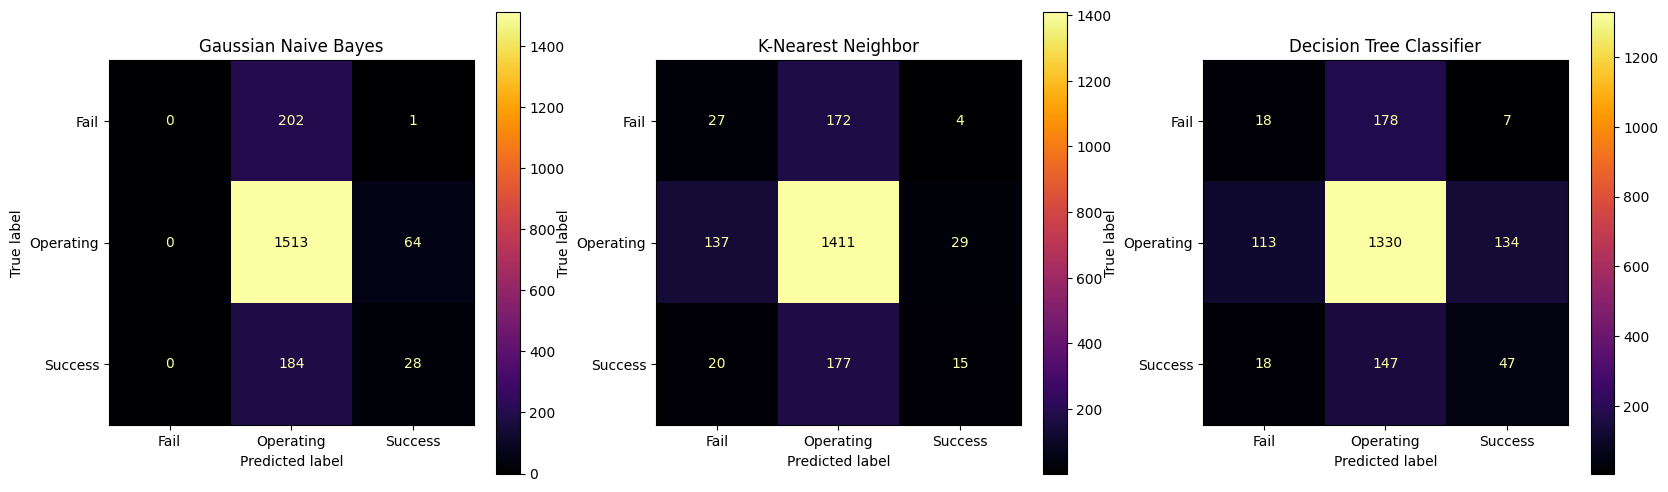

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["Fail", "Operating", "Success"]

gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='inferno')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='inferno')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='inferno')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()

Output di atas menampilkan 3 (tiga) Confusion Matrix 3x3. Gambar 1 adalah Confusion Matrix untuk algoritma GNB, lalu gambar 2 untuk algoritma KNN, dan gambar 3 untuk algoritma DCT. Sumbu X merupakan predicted label atau predicted values dan sumbu Y merupakan true label atau actual values. Muncul Confusion Matrix 3x3 karena mempunyai lebih dari 2 kategori, dimana kolom target yaitu 'status_class' memiliki 3 kategori yaitu 0; Fail, 1; Operating, dan 2; Success.

Di bawah ini akan dijabarkan Confusion Matrix 2x2 dari setiap algoritma.

GNB Confusion Matrix 2x2

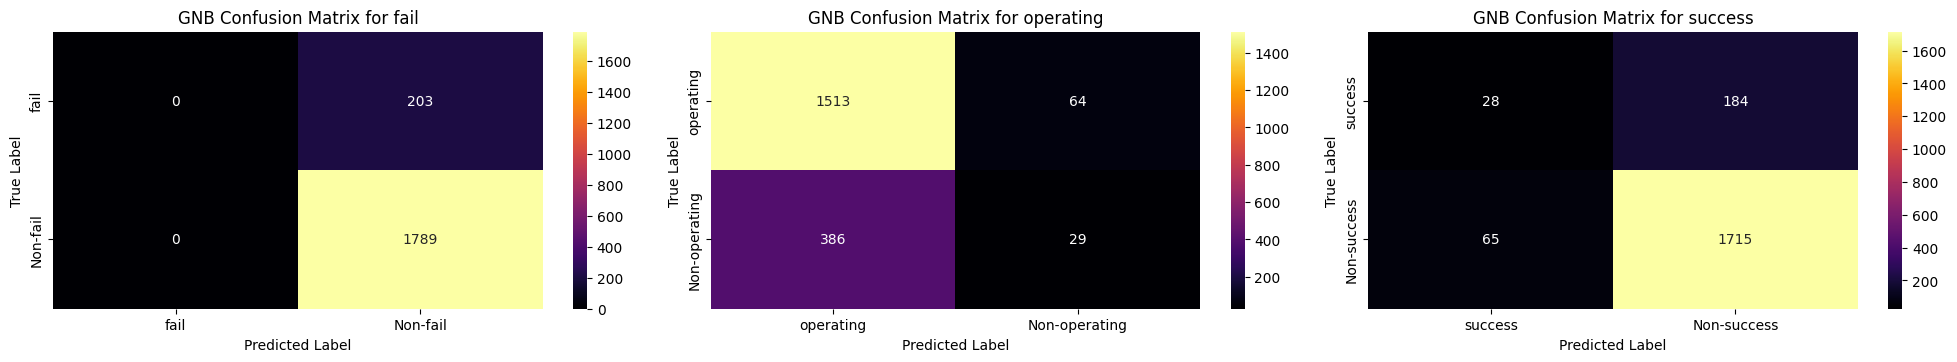

In [81]:
plt.figure(figsize=(20, 10))

class_names = [0, 1, 2]

TN_manual_fail = gnb_cm[1, 1] + gnb_cm[1, 2] + gnb_cm[2, 1] + gnb_cm[2, 2]
TN_manual_operating = gnb_cm[0, 0] + gnb_cm[0, 2] + gnb_cm[2, 0] + gnb_cm[2, 2]
TN_manual_success = gnb_cm[0, 0] + gnb_cm[0, 1] + gnb_cm[1, 0] + gnb_cm[1, 1]

# FAIL
plt.subplot(3, 3, 1)
sns.heatmap(pd.DataFrame([[gnb_cm[0, 0], gnb_cm[0, 1] + gnb_cm[0, 2]],
                          [gnb_cm[1, 0] + gnb_cm[2, 0], TN_manual_fail]],
                         index=['fail', 'Non-fail'], columns=['fail', 'Non-fail']), annot=True, fmt=".0f", cmap="inferno")
plt.title('GNB Confusion Matrix for fail')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# OPERATING
plt.subplot(3, 3, 2)
sns.heatmap(pd.DataFrame([[gnb_cm[1, 1], gnb_cm[1, 0] + gnb_cm[1, 2]],
                          [gnb_cm[0, 1] + gnb_cm[2, 1], TN_manual_operating]],
                         index=['operating', 'Non-operating'], columns=['operating', 'Non-operating']), annot=True, fmt=".0f", cmap="inferno")
plt.title('GNB Confusion Matrix for operating')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# SUCCESS
plt.subplot(3, 3, 3)
sns.heatmap(pd.DataFrame([[gnb_cm[2, 2], gnb_cm[2, 0] + gnb_cm[2, 1]],
                          [gnb_cm[0, 2] + gnb_cm[1, 2], TN_manual_success]],
                         index=['success', 'Non-success'], columns=['success', 'Non-success']), annot=True, fmt=".0f" ,cmap="inferno")
plt.title('GNB Confusion Matrix for success')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

Berdasarkan output di atas, ada 3 gambar yang tertera yaitu GNB Confusion Matrix 2x2 untuk kategori 'Fail, 'Operating', dan 'Success'.

* Pada GNB Confusion Matrix for Fail, terdapat 0 data Fail yang benar diprediksi oleh model. 203 data yang sebenarnya Fail tapi diprediksi sebagai not fail oleh model. 0 data not fail yang dianggap fail oleh model. Dan 1789 data not fail yang benar diprediksi oleh model.

* Pada GNB Confusion Matrix for Operating, terdapat 1513 data operating yang benar diprediksi oleh model. 64 data yang sebenarnya operating tapi diprediksi sebagai not operating oleh model. 386 data not operating yang dianggap operating oleh model. Dan 29 data not operating yang benar diprediksi oleh model.

* Terakhir, pada GNB Confusion Matrix for Success, terdapat 28 data success yang benar diprediksi oleh model. 184 data yang sebenarnya success tapi diprediksi sebagai not success oleh model. 65 data not success yang dianggap success oleh model. Dan 1715 data not success yang benar diprediksi oleh model.

KNN Confusion Matrix 2x2

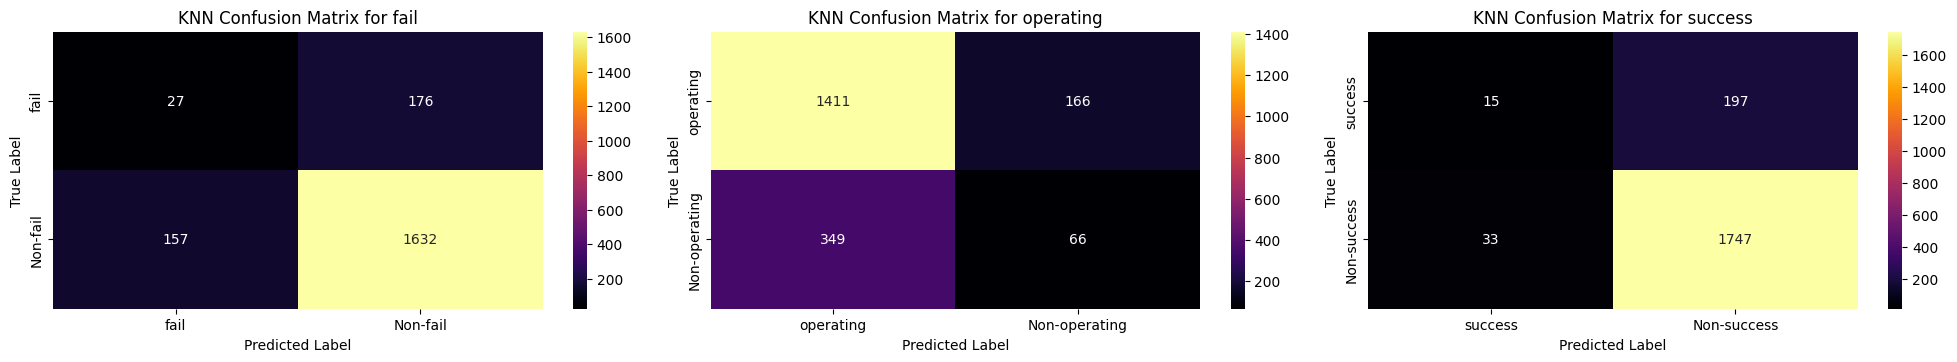

In [82]:
plt.figure(figsize=(20, 10))

class_names = [0, 1, 2]

TN_manual_fail = knn_cm[1, 1] + knn_cm[1, 2] + knn_cm[2, 1] + knn_cm[2, 2]
TN_manual_operating = knn_cm[0, 0] + knn_cm[0, 2] + knn_cm[2, 0] + knn_cm[2, 2]
TN_manual_success = knn_cm[0, 0] + knn_cm[0, 1] + knn_cm[1, 0] + knn_cm[1, 1]

# FAIL
plt.subplot(3, 3, 1)
sns.heatmap(pd.DataFrame([[knn_cm[0, 0], knn_cm[0, 1] + knn_cm[0, 2]],
                          [knn_cm[1, 0] + knn_cm[2, 0], TN_manual_fail]],
                         index=['fail', 'Non-fail'], columns=['fail', 'Non-fail']), annot=True, fmt=".0f", cmap="inferno")
plt.title('KNN Confusion Matrix for fail')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# OPERATING
plt.subplot(3, 3, 2)
sns.heatmap(pd.DataFrame([[knn_cm[1, 1], knn_cm[1, 0] + knn_cm[1, 2]],
                          [knn_cm[0, 1] + knn_cm[2, 1], TN_manual_operating]],
                         index=['operating', 'Non-operating'], columns=['operating', 'Non-operating']), annot=True, fmt=".0f", cmap="inferno")
plt.title('KNN Confusion Matrix for operating')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# SUCCESS
plt.subplot(3, 3, 3)
sns.heatmap(pd.DataFrame([[knn_cm[2, 2], knn_cm[2, 0] + knn_cm[2, 1]],
                          [knn_cm[0, 2] + knn_cm[1, 2], TN_manual_success]],
                         index=['success', 'Non-success'], columns=['success', 'Non-success']), annot=True, fmt=".0f" ,cmap="inferno")
plt.title('KNN Confusion Matrix for success')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

Berdasarkan output di atas, ada 3 gambar yang tertera yaitu KNN Confusion Matrix 2x2 untuk kategori 'Fail, 'Operating', dan 'Success'.

* Pada KNN Confusion Matrix for Fail, terdapat 27 data Fail yang benar diprediksi oleh model. 176 data yang sebenarnya Fail tapi diprediksi sebagai not fail oleh model. 157 data not fail yang dianggap fail oleh model. Dan 1632 data not fail yang benar diprediksi oleh model.

* Pada KNN Confusion Matrix for Operating, terdapat 1411 data operating yang benar diprediksi oleh model. 166 data yang sebenarnya operating tapi diprediksi sebagai not operating oleh model. 349 data not operating yang dianggap operating oleh model. Dan 66 data not operating yang benar diprediksi oleh model.

* Terakhir, pada KNN Confusion Matrix for Success, terdapat 15 data success yang benar diprediksi oleh model. 197 data yang sebenarnya success tapi diprediksi sebagai not success oleh model. 33 data not success yang dianggap success oleh model. Dan 1747 data not success yang benar diprediksi oleh model.

DTC Confussion Matrix 2x2

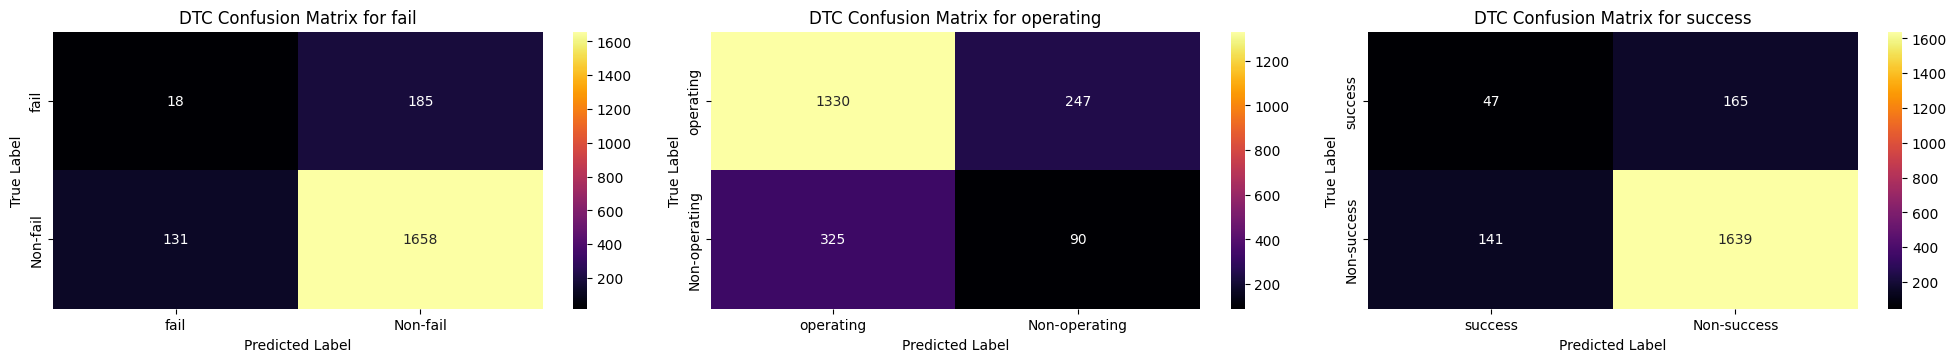

In [83]:
plt.figure(figsize=(20, 10))

class_names = [0, 1, 2]

TN_manual_fail = dtc_cm[1, 1] + dtc_cm[1, 2] + dtc_cm[2, 1] + dtc_cm[2, 2]
TN_manual_operating = dtc_cm[0, 0] + dtc_cm[0, 2] + dtc_cm[2, 0] + dtc_cm[2, 2]
TN_manual_success = dtc_cm[0, 0] + dtc_cm[0, 1] + dtc_cm[1, 0] + dtc_cm[1, 1]

# FAIL
plt.subplot(3, 3, 1)
sns.heatmap(pd.DataFrame([[dtc_cm[0, 0], dtc_cm[0, 1] + dtc_cm[0, 2]],
                          [dtc_cm[1, 0] + dtc_cm[2, 0], TN_manual_fail]],
                         index=['fail', 'Non-fail'], columns=['fail', 'Non-fail']), annot=True, fmt=".0f", cmap="inferno")
plt.title('DTC Confusion Matrix for fail')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# OPERATING
plt.subplot(3, 3, 2)
sns.heatmap(pd.DataFrame([[dtc_cm[1, 1], dtc_cm[1, 0] + dtc_cm[1, 2]],
                          [dtc_cm[0, 1] + dtc_cm[2, 1], TN_manual_operating]],
                         index=['operating', 'Non-operating'], columns=['operating', 'Non-operating']), annot=True, fmt=".0f", cmap="inferno")
plt.title('DTC Confusion Matrix for operating')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# SUCCESS
plt.subplot(3, 3, 3)
sns.heatmap(pd.DataFrame([[dtc_cm[2, 2], dtc_cm[2, 0] + dtc_cm[2, 1]],
                          [dtc_cm[0, 2] + dtc_cm[1, 2], TN_manual_success]],
                         index=['success', 'Non-success'], columns=['success', 'Non-success']), annot=True, fmt=".0f" ,cmap="inferno")
plt.title('DTC Confusion Matrix for success')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

Berdasarkan output di atas, ada 3 gambar yang tertera yaitu DTC Confusion Matrix 2x2 untuk kategori 'Fail, 'Operating', dan 'Success'.

* Pada DTC Confusion Matrix for Fail, terdapat 19 data Fail yang benar diprediksi oleh model. 184 data yang sebenarnya Fail tapi diprediksi sebagai not fail oleh model. 132 data not fail yang dianggap fail oleh model. Dan 1657 data not fail yang benar diprediksi oleh model.

* Pada DTC Confusion Matrix for Operating, terdapat 1325 data operating yang benar diprediksi oleh model. 252 data yang sebenarnya operating tapi diprediksi sebagai not operating oleh model. 321 data not operating yang dianggap operating oleh model. Dan 94 data not operating yang benar diprediksi oleh model.

* Terakhir, pada DTC Confusion Matrix for Success, terdapat 48 data success yang benar diprediksi oleh model. 164 data yang sebenarnya success tapi diprediksi sebagai not success oleh model. 147 data not success yang dianggap success oleh model. Dan 1633 data not success yang benar diprediksi oleh model.

Dari semua matriks yang ada, dapat dikatakan bahwa algoritma yang paling optimal kinerja nya adalah algoritma Gaussian Naive Bayes (GNB).

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Gaussian Naive Bayes
accuracy_gnb = accuracy_score(y_test, gnb_pred)
precision_gnb = precision_score(y_test, gnb_pred, average='weighted')
recall_gnb = recall_score(y_test, gnb_pred, average='weighted')
f1_score_gnb = f1_score(y_test, gnb_pred, average='weighted')

gnb_probs = gnb.predict_proba(x_test_norm)
roc_score_gnb = roc_auc_score(y_test, gnb_probs, multi_class='ovr')

# K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, knn_pred)
precision_knn = precision_score(y_test, knn_pred, average='weighted')
recall_knn = recall_score(y_test, knn_pred, average='weighted')
f1_score_knn = f1_score(y_test, knn_pred, average='weighted')

knn_probs = knn.predict_proba(x_test_norm)
roc_score_knn = roc_auc_score(y_test, knn_probs, multi_class='ovr')

# Decision Tree Classifier
accuracy_dtc = accuracy_score(y_test, dtc_pred)
precision_dtc = precision_score(y_test, dtc_pred, average='weighted')
recall_dtc = recall_score(y_test, dtc_pred, average='weighted')
f1_score_dtc = f1_score(y_test, dtc_pred, average='weighted')

dtc_probs = dtc.predict_proba(x_test_norm)
roc_score_dtc = roc_auc_score(y_test, dtc_probs, multi_class='ovr')

# Simpan hasil evaluasi dalam dataframe
eval_metrics = {
    "Model": ["Gaussian Naive Bayes", "K-Nearest Neighbors", "Decision Tree Classifier"],
    "Akurasi": [accuracy_gnb, accuracy_knn, accuracy_dtc],
    "Presisi": [precision_gnb, precision_knn, precision_dtc],
    "Recall": [recall_gnb, recall_knn, recall_dtc],
    "F1-Score": [f1_score_gnb, f1_score_knn, f1_score_dtc],
    "ROC AUC Score": [roc_score_gnb, roc_score_knn, roc_score_dtc]
}

df_eval = pd.DataFrame(eval_metrics)
df_eval

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Model,Akurasi,Presisi,Recall,F1-Score,ROC AUC Score
0,Gaussian Naive Bayes,0.773594,0.662791,0.773594,0.708719,0.643360
1,K-Nearest Neighbors,0.729418,0.682895,0.729418,0.695988,0.606079
2,Decision Tree Classifier,0.700301,0.675121,0.700301,0.686990,0.562170


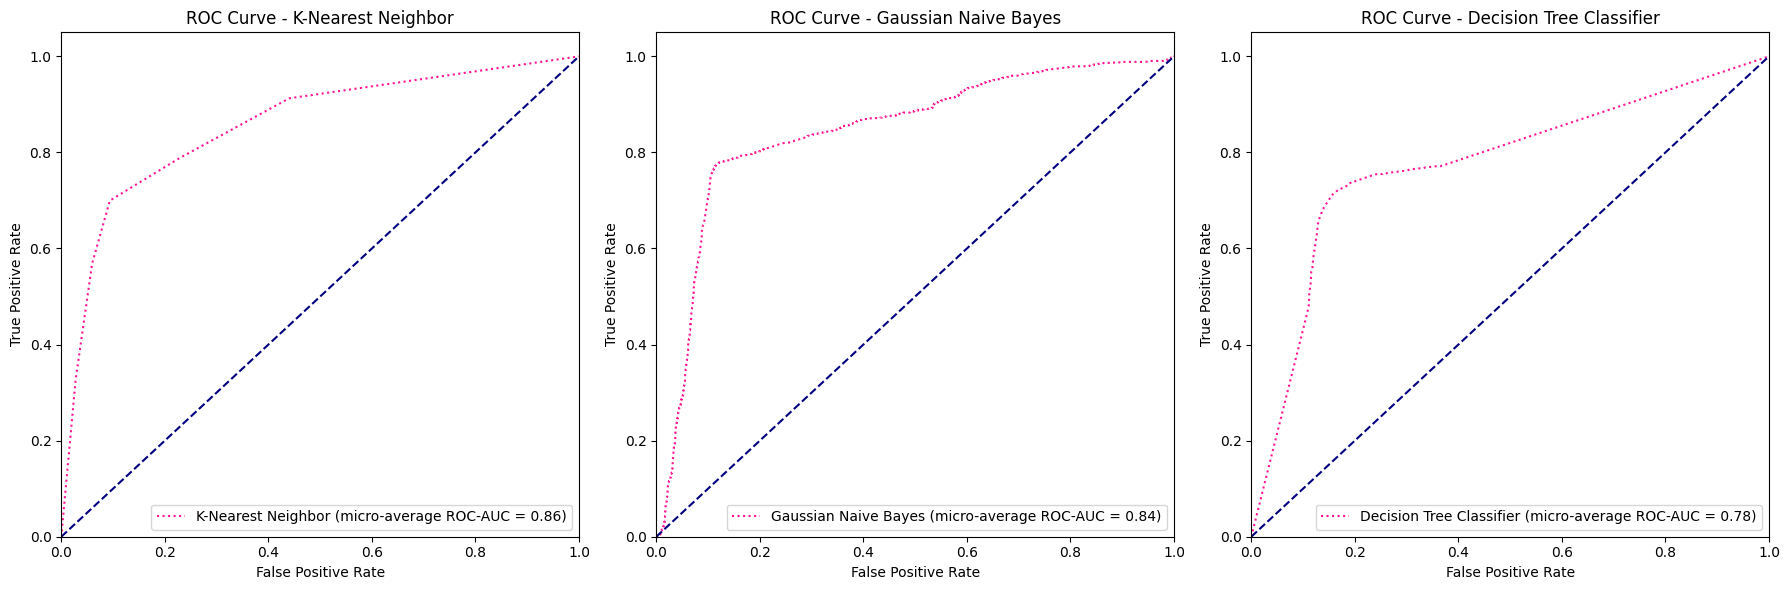

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Membuat objek LabelBinarizer
lb = LabelBinarizer()

# Mengonversi label menjadi bentuk one-hot encoding
y_test_bin = lb.fit_transform(y_test)

models = [knn, gnb, dtc]
model_names = ['K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Decision Tree Classifier']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for model, name, ax in zip(models, model_names, axes):
    y_pred_proba = model.predict_proba(x_test_norm)
    num_classes = y_pred_proba.shape[1]  # Jumlah kelas

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = roc_auc_score(y_test_bin, y_pred_proba, average="micro")

    ax.plot(fpr["micro"], tpr["micro"], label=f'{name} (micro-average ROC-AUC = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':')
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {name}')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

Dari ROC Curve yang ada di atas, terlihat bahwa yang paling tinggi adalah ROC Curve K-Nearest Neighbor (KNN) yaitu 0.86 . Disusul dengan ROC Curve Gaussian Naive Bayes (GNB) yaitu 0.84 .

##**Review Process**

###**Cross Validation**

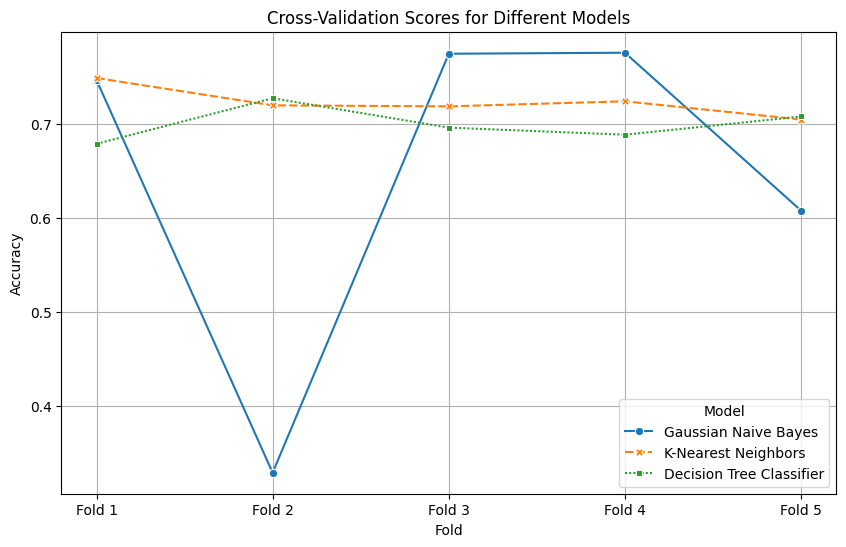

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Terlihat bahwa algoritma KNN adalah yang paling optimal.

###**Feature Selection**

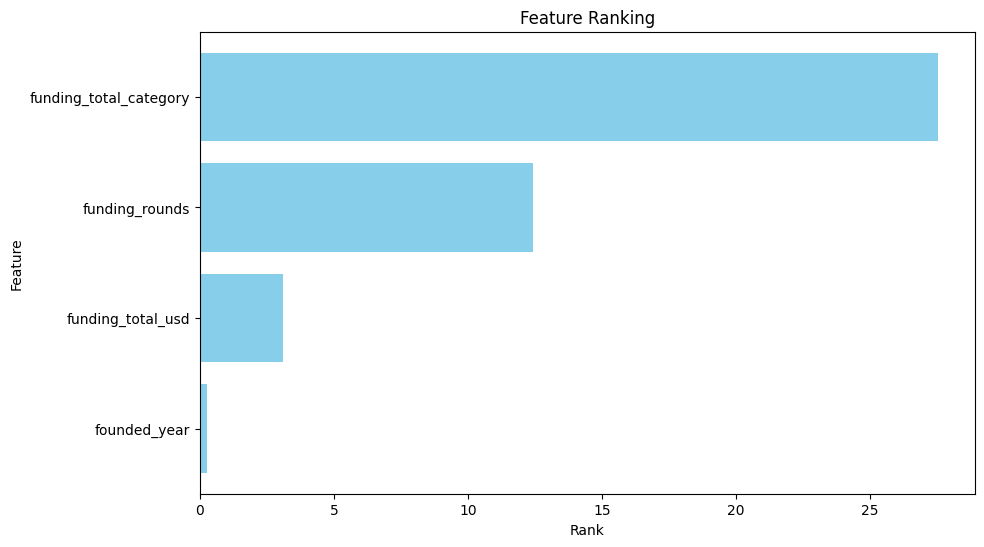

In [87]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import pandas as pd

# Normalisasi fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)

# Importing SelectKBest and chi2
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Feature Selection pake DTC

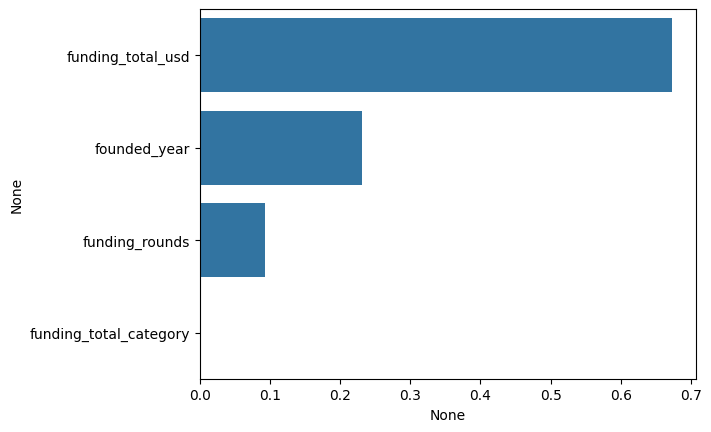

In [88]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

Berdasarkan output-output di atas, dapat disimpulkan bahwa fitur-fitur yang berpengaruh terhadap analisis adalah funding_total_category, funding_rounds, funding_total_usd, dan founded_year. Ke empat kolom tersebut akan menentukan hasil dari penelitian.

###**Tuning Hyperparamater**

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 1.0}
Akurasi sebelum tuning: 0.7735943775100401
Akurasi setelah tuning: 0.7916666666666666


In [90]:
param_grid = {
    'n_neighbors': range(1, 21),  # Coba nilai K dari 1 hingga 20
    'weights': ['uniform', 'distance'],  # Coba kedua jenis bobot
    'p': [1, 2]  # Coba kedua jenis jarak (Manhattan dan Euclidean)
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = knn.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}
Akurasi sebelum tuning: 0.7294176706827309
Akurasi setelah tuning: 0.7896586345381527


In [91]:
# Definisikan grid parameter yang akan ditelusuri
param_grid = {
    'criterion': ['gini', 'entropy'],  # Coba kedua jenis kriteria pemilihan fitur
    'max_depth': [None, 10, 20, 30, 40, 50],  # Coba beberapa kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Coba beberapa nilai minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Coba beberapa nilai minimum sampel di leaf node
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Akurasi sebelum tuning: 0.7003012048192772
Akurasi setelah tuning: 0.767570281124498


###**Determine Steps**

Berdasarkan analisa-analisa di atas, hasil setelah tuning menunjukkan bahwa akurasi setelah tuning di setiap algoritma meningkat. Dan tingkat akurasi yang paling tinggi setelah tuning adalah pada algoritma Gaussian Naive Bayes (GNB) yaitu 0.7916666666666666. Karena tingkat akurasi yang tidak terlalu rendah, maka dapat disimpulkan bahwa analisa ini tidak perlu mengulang ke tahap sebelumnya dan dapat lanjut ke tahapan berikutnya.